In [2]:
#Importing Necessary Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [3]:
#Load and assign data set
df = pd.read_csv('loan_data.csv')

In [4]:
#Check about first 5 data rows
df.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
1,1,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
2,2,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
3,3,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
4,4,LP001013,Male,Yes,0,Not Graduate,No,2333.0,1516.0,95.0,360.0,1.0,Urban,Y


In [5]:
#Check about null data columns
df.isnull().sum()

Unnamed: 0            0
Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             6
Self_Employed        21
ApplicantIncome      12
CoapplicantIncome    18
LoanAmount            8
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
#get the summary of how data sacattered
df.describe()

,Unnamed: 0,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,369.000000,363.000000,373.000000,370.000000,351.000000
mean,190.000000,3563.422764,1267.005289,104.914209,340.864865,0.837607
std,110.129469,1427.371257,2388.048316,28.484822,68.549257,0.369338
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,95.000000,2583.000000,0.000000,90.000000,360.000000,1.000000
50%,190.000000,3326.000000,830.000000,110.000000,360.000000,1.000000
75%,285.000000,4226.000000,2008.000000,127.000000,360.000000,1.000000
max,380.000000,9703.000000,33837.000000,150.000000,480.000000,1.000000


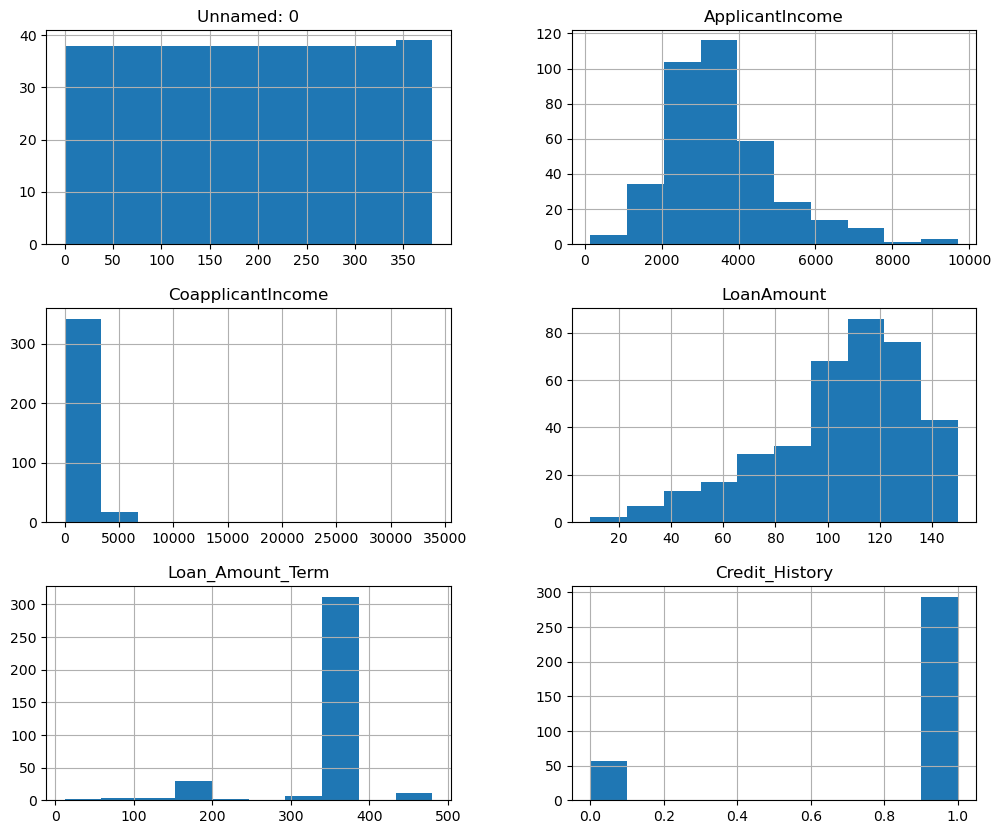

In [7]:
#Generating Histograms
df.hist(figsize=(12,10))
plt.show()

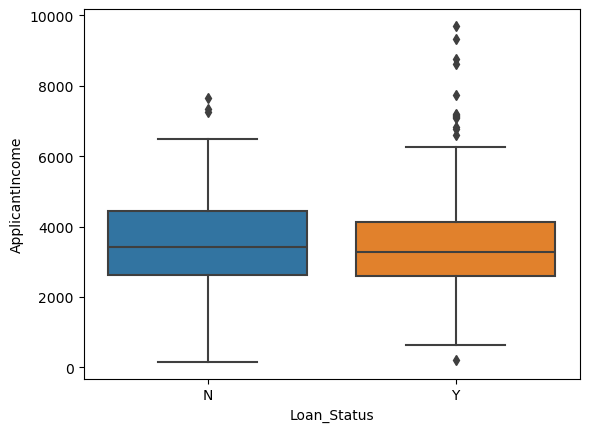

In [8]:
#Generating box plot
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df)
plt.show()

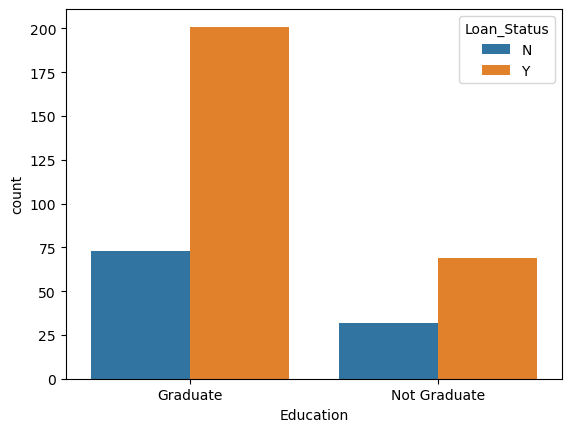

In [9]:
#Generate counter plot
sns.countplot(x='Education', hue='Loan_Status', data=df)
plt.show()

In [10]:
#################################*************  DATA PREPROCESSING ************########################################################

In [11]:
#Drop columns that not much effect to the predictions.
columns_to_drop = ['Unnamed: 0', 'Loan_ID']
df_1 = df.drop(columns=columns_to_drop, inplace=False)
df_1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,0,Not Graduate,No,2333.0,1516.0,95.0,360.0,1.0,Urban,Y


In [12]:
#Getting Count Of Missing Values In Each Column
df_1.isnull().sum()

Gender                5
Married               0
Dependents            8
Education             6
Self_Employed        21
ApplicantIncome      12
CoapplicantIncome    18
LoanAmount            8
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
#Fill the numerical value columns null data points with mean to avoid null values
numerical_cols_to_fill = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
df_1[numerical_cols_to_fill] = df_1[numerical_cols_to_fill].fillna(df[numerical_cols_to_fill].mean())
df_1.isnull().sum()

Gender                5
Married               0
Dependents            8
Education             6
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
#Drop the categorical value columns data rows that containing null values for avoid null data points
columns_to_check = ['Gender','Dependents','Education', 'Self_Employed', 'Credit_History']
df_1.dropna(subset=columns_to_check, inplace=True)
df_1.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
#Get the size of data set after cleaning null values
df_1.shape

(311, 12)

In [16]:
#Converting categerical variables to numerical values using Label Encorder
label_encoder = LabelEncoder()

categorical_cols_to_label_encode = ['Gender', 'Married','Dependents' , 'Education','Self_Employed','Property_Area','Loan_Status']

for col in categorical_cols_to_label_encode:
    df_1[col] = label_encoder.fit_transform(df_1[col])

df_1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0,0
1,1,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,2,1
2,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2,1
3,1,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,2,1
4,1,1,0,1,0,2333.0,1516.0,95.0,360.0,1.0,2,1


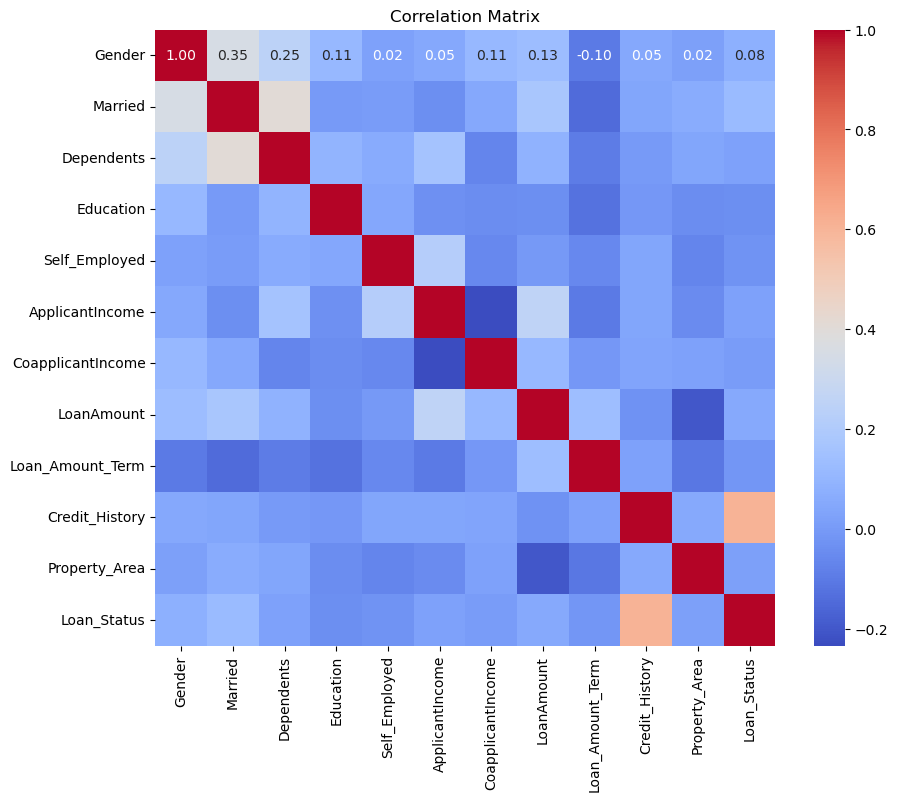

Highly correlated column pairs: []
There are no highly correlated column pairs.


In [17]:
#Generating Corelation Mtrix ForLatest Data Set
correlation_matrix = df_1.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

threshold = 0.8

high_correlation = (correlation_matrix.abs() > threshold) & (correlation_matrix.abs() < 1.0)
high_correlation_pairs = [(correlation_matrix.columns[i], correlation_matrix.columns[j]) for i in range(len(high_correlation.columns)) for j in range(i+1, len(high_correlation.columns)) if high_correlation.iloc[i, j]]

print("Highly correlated column pairs:", high_correlation_pairs)  # Debugging print
if len(high_correlation_pairs) == 0:
    print("There are no highly correlated column pairs.")
else:
    print("Highly correlated column pairs:")
    for pair in high_correlation_pairs:
        print(f"{pair[0]} - {pair[1]}: {correlation_matrix.loc[pair[0], pair[1]]}")


In [18]:
#By using robust scaler scale data point to between one range
scaler = RobustScaler()
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Property_Area']
df_1[numerical_features] = scaler.fit_transform(df_1[numerical_features])
print(df_1.head())

   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        1           1          0              0         0.752147   
1       1        1           0          0              1        -0.219018   
2       1        1           0          1              0        -0.474847   
3       1        0           0          0              0         1.621472   
4       1        1           0          1              0        -0.628221   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0           0.256989    0.480000               0.0             1.0   
1          -0.553763   -1.173333               0.0             1.0   
2           0.713978    0.266667               0.0             1.0   
3          -0.553763    0.826667               0.0             1.0   
4           0.261290   -0.400000               0.0             1.0   

   Property_Area  Loan_Status  
0           -0.5            0  
1            0.5            1  
2            0.5    

In [19]:
#Splitting the dataset to  train and test
X = df_1.drop('Loan_Status', axis=1)  # Features
y = df_1['Loan_Status']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_features = X_train.shape[(1)]
train_size = X_test.shape[(0)]
test_features = X_test.shape[(1)]
test_size = X_test.shape[(0)]

print("Number Of Features In Test Set :", train_features)
print("Size of Train set:", train_size)
print("Number Of Features In Train Set :", test_features)
print("Size of Test set:", test_size)

Number Of Features In Test Set : 11
Size of Train set: 63
Number Of Features In Train Set : 11
Size of Test set: 63


In [20]:
             #############************----------- Training The Models -----------************#############

In [21]:
######################################----LOGISTIC REGRESSION----######################################

In [22]:
# Train THe Data Set Using Logistic Regression Algorithm
params = {
    'C': 1,                   # Regularization parameter
    'penalty': 'l1',            # Regularization penalty ('l1' for Lasso, 'l2' for Ridge)
    'solver': 'liblinear',      # Algorithm to use in the optimization problem
    'max_iter': 100             # Maximum number of iterations for optimization
}
logistic_regression = LogisticRegression(**params)
logistic_regression.fit(X_train, y_train)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [23]:
#Gettin Prediction And Get Evaluate Matrics
y_pred = logistic_regression.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, logistic_regression.predict_proba(X_test)[:, 1])  # Use predicted probabilities for ROC-AUC
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8095238095238095
Precision: 0.8113207547169812
Recall: 0.9555555555555556
F1-score: 0.8775510204081634
ROC-AUC: 0.6975308641975309
Confusion Matrix:
[[ 8 10]
 [ 2 43]]


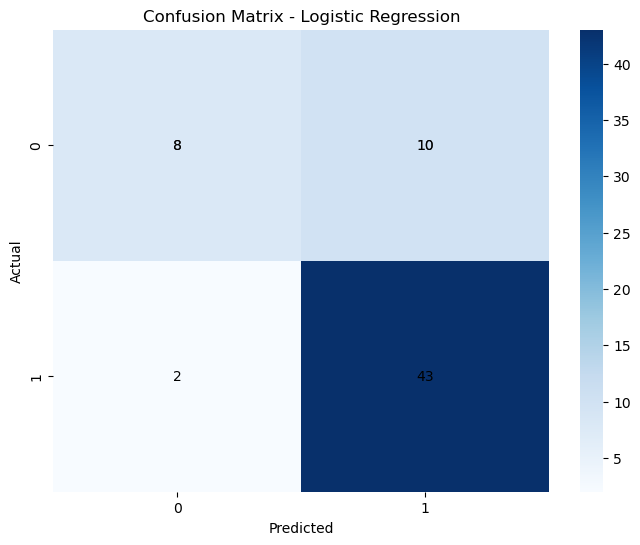

In [24]:
#Plot confusion matrix for Logistic Regresssion model
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, cmap='Blues', annot=True, fmt='d')
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix)):
        plt.text(j+0.5, i+0.5, conf_matrix[i, j], ha='center', va='center', color='black', fontsize=10)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [25]:
#Using Grid search cv optimize the Logistic Regression Hyper Parameters
logistic_regression = LogisticRegression()

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [200, 500, 1000]
}
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)


C:\Users\94705\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\94705\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\94705\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\94705\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\94705\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\94705\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

LogisticRegression(C=1, max_iter=200, penalty='l1', solver='liblinear')

In [26]:
#Generate Evaluation Matrix For best Parameters.
y_pred = best_model.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Evaluation Metrics:
Accuracy: 0.8095
Precision: 0.8113
Recall: 0.9556
F1-score: 0.8776

Confusion Matrix:
[[ 8 10]
 [ 2 43]]


In [27]:
######################################----DECISION TREE----######################################

In [28]:
#Train The Data Set Using Decision Treee Classifier 
decision_tree = DecisionTreeClassifier(max_depth=5, min_samples_split=2, min_samples_leaf=1)

# Train the decision tree classifier on the training data
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [29]:
# Getting Predictions And Evaluation Matrics for Decision Tree Classifier Model
y_pred = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

Evaluation Metrics:
Accuracy: 0.8095
Precision: 0.8235
Recall: 0.9333
F1-score: 0.8750

Confusion Matrix:
[[ 9  9]
 [ 3 42]]


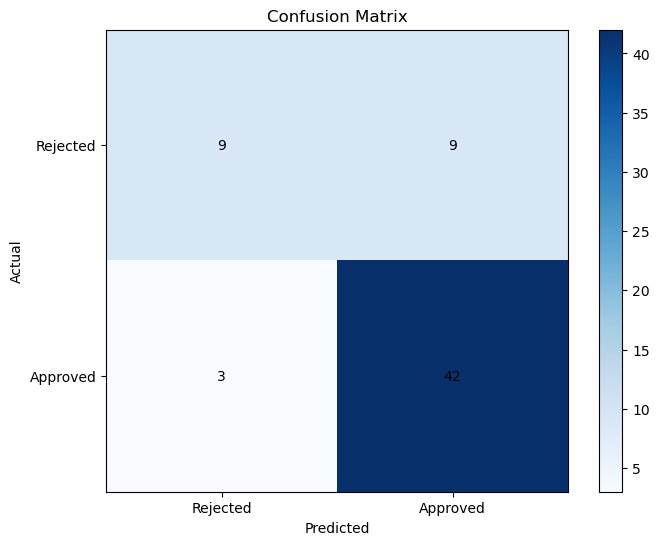

In [30]:
# Plot confusion matrix for Decission Tree Classifier Model
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', verticalalignment='center')

plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0, 1], ['Rejected', 'Approved'])
plt.yticks([0, 1], ['Rejected', 'Approved'])
plt.show()


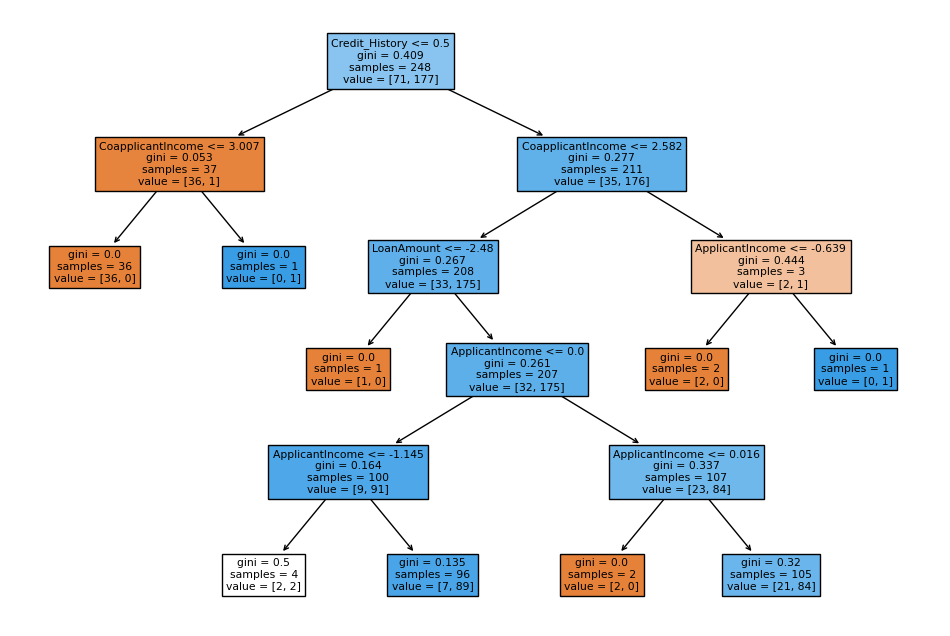

In [31]:
# Visualize decision tree for the model
plt.figure(figsize=(12, 8))
plot_tree(decision_tree, filled=True, feature_names=X.columns)
plt.show()

In [32]:
#Checkoin for optimize decission tree hyper parameters
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

decision_tree = DecisionTreeClassifier()

grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

best_model = grid_search.best_estimator_

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [33]:
######################################----RANDOM FOREST----######################################

In [34]:
# Train dataset using random forest algorithm
random_forest = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)

random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [35]:
#Getting Predictions and Evaluation Matrics
y_pred = random_forest.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

Evaluation Metrics:
Accuracy: 0.8571
Precision: 0.8600
Recall: 0.9556
F1-score: 0.9053

Confusion Matrix:
[[11  7]
 [ 2 43]]


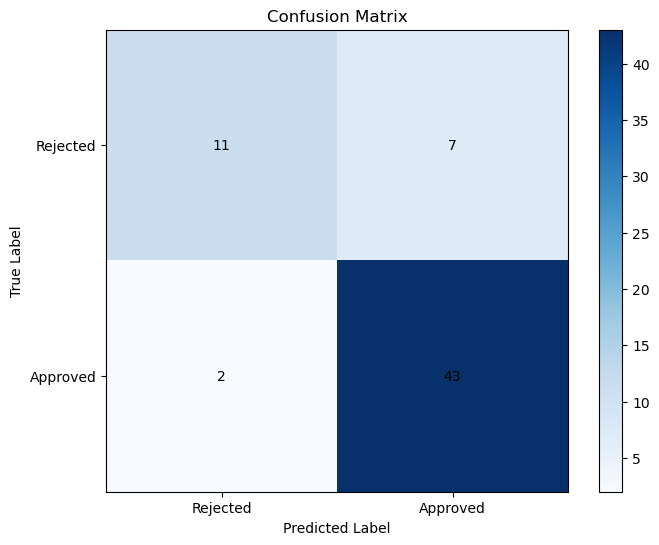

In [36]:
# Plot confusion matrix 
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', verticalalignment='center')

plt.title('Confusion Matrix')
plt.colorbar()
classes = ['Rejected', 'Approved']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [37]:
#Check For Best Hyper Parameters To The Random Forest Algorithm  

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_forest = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(random_forest, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

best_model = grid_search.best_estimator_

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [38]:
######################################----SUPPORT VECTOR MACHINE (SVM)----######################################

In [39]:
#Train Model Using Support vector Machine
svm_classifier = SVC(kernel='linear', C=0.1, gamma='scale')

svm_classifier.fit(X_train, y_train)

SVC(C=0.1, kernel='linear')

In [40]:
#Getting Predictions and Evaluation Matrics for Support Vector Machine
y_pred = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

Evaluation Metrics:
Accuracy: 0.8095
Precision: 0.8113
Recall: 0.9556
F1-score: 0.8776

Confusion Matrix:
[[ 8 10]
 [ 2 43]]


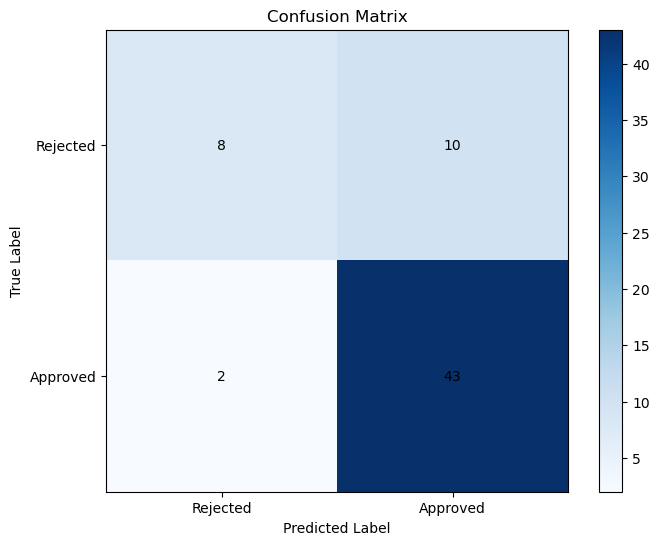

In [41]:
# Plot Conussion Matrix For  Support Vector Machine
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', verticalalignment='center')

plt.title('Confusion Matrix')
plt.colorbar()
classes = ['Rejected', 'Approved']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [42]:
#Check For Best Hyper Parameters To The Support Vector Machine
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svm_classifier = SVC()

grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

best_model = grid_search.best_estimator_

Best hyperparameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
